In [1]:
import pandas as pd

df_train = pd.read_csv('SMM4H_2024_Task3_Training_1800.csv', usecols=['keyword', 'text', 'label'])
df_train = df_train.dropna()
df_train.describe()

,label
count,1800.000000
mean,0.717778
std,1.010955
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,3.000000


In [6]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

In [8]:
df = df_train

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


max:  1024
min:  6


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

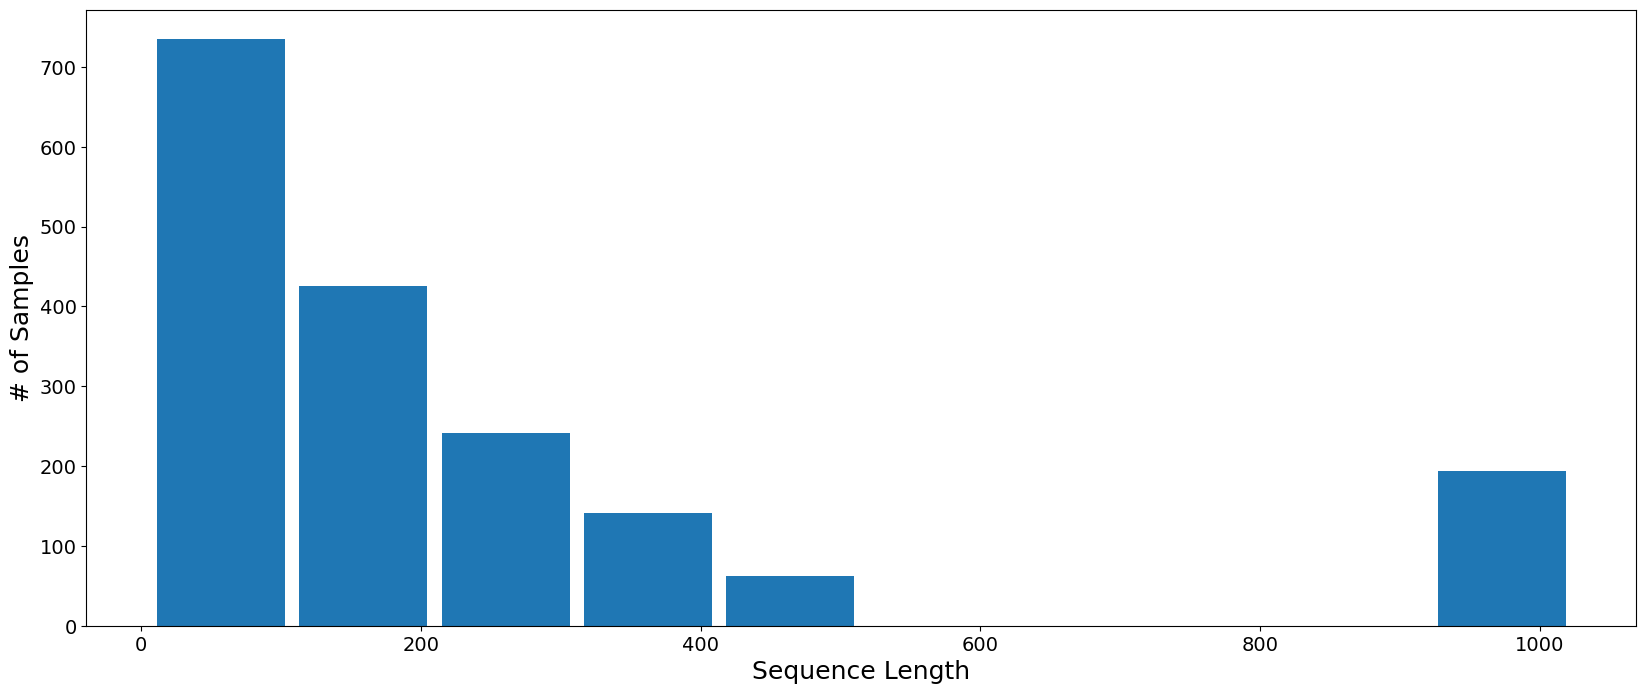

In [11]:
# tokenize the text feature 
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.Text.values.tolist(), 
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True      
                   )# collect tokenized sentence length 

token_sentence_length = [len(x) if len(x) < 512 else 1024 for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))# plot the distribution

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [12]:
len(list(filter(lambda x: x>600, token_sentence_length)))

194